In [ ]:
import pandas as pd
occup = pd.read_csv('RelatedOccupations_ONET_27_3csv.csv',encoding='latin1', usecols = ['Title', 'Related Title'])
statements = pd.read_csv('TaskStatements_ONET_27_3csv.csv', encoding ='latin1', usecols=['Title','Task'])
element = pd.read_csv('Interests_ONET_27_3csv.csv', encoding ='latin1', usecols = ['Title', 'Element Name'])

In [ ]:
occup.head()

,Title,Related Title
0,Chief Executives,General and Operations Managers
1,Chief Executives,Social and Community Service Managers
2,Chief Executives,Treasurers and Controllers
3,Chief Executives,Human Resources Managers
4,Chief Executives,Financial Managers


In [ ]:
statements.head()

,Title,Task
0,Chief Executives,Direct or coordinate an organization's financi...
1,Chief Executives,Appoint department heads or managers and assig...
2,Chief Executives,Analyze operations to evaluate performance of ...
3,Chief Executives,"Direct, plan, or implement policies, objective..."
4,Chief Executives,"Prepare budgets for approval, including those ..."


In [ ]:
element.head()

,Title,Element Name
0,Chief Executives,Realistic
1,Chief Executives,Investigative
2,Chief Executives,Artistic
3,Chief Executives,Social
4,Chief Executives,Enterprising


In [ ]:

index_names = element[element['Element Name']=='Third Interest High-Point'].index
element.drop(index_names, inplace = True)
index2 = element[element['Element Name'] == 'First Interest High-Point'].index
index3 = element[element['Element Name'] == 'Second Interest High-Point'].index
element.drop(index2, inplace = True)
element.drop(index3, inplace=True)
element.head()

,Title,Element Name
0,Chief Executives,Realistic
1,Chief Executives,Investigative
2,Chief Executives,Artistic
3,Chief Executives,Social
4,Chief Executives,Enterprising


In [ ]:
data = {'Occup.Title': occup['Related Title'], 'Job Statements':statements['Task'],
        'Element':element['Element Name']}

In [ ]:
train_dat = pd.DataFrame(data)
train_dat = train_dat.dropna()



In [ ]:
pd.unique(train_dat['Element'])

array(['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising',
       'Conventional'], dtype=object)

In [ ]:
my_elements = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising',
       'Conventional']

In [ ]:
train_dat.head()

,Occup.Title,Job Statements,Element
0,General and Operations Managers,Direct or coordinate an organization's financi...,Realistic
1,Social and Community Service Managers,Appoint department heads or managers and assig...,Investigative
2,Treasurers and Controllers,Analyze operations to evaluate performance of ...,Artistic
3,Human Resources Managers,"Direct, plan, or implement policies, objective...",Social
4,Financial Managers,"Prepare budgets for approval, including those ...",Enterprising


In [ ]:
train_dat.size

15732

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_dat['Element_Cat']= lb.fit_transform(train_dat['Element'])
train_dat.head()

,Occup.Title,Job Statements,Element,Element_Cat
0,General and Operations Managers,Direct or coordinate an organization's financi...,Realistic,4
1,Social and Community Service Managers,Appoint department heads or managers and assig...,Investigative,3
2,Treasurers and Controllers,Analyze operations to evaluate performance of ...,Artistic,0
3,Human Resources Managers,"Direct, plan, or implement policies, objective...",Social,5
4,Financial Managers,"Prepare budgets for approval, including those ...",Enterprising,2


In [ ]:
test_dat = pd.read_csv('PD_Descriptions_Final_Table.csv', encoding='latin1', usecols=['Job Title','Description'])
test_dat = test_dat.dropna()
X2 = test_dat['Description']
y2 = test_dat['Job Title']

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
sns.set() # use seaborn plotting style

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

stop_words = nltk.corpus.stopwords.words('english')
extra = ["incumbent","organization","program","qms","facility","projectprogram","work",
                 "faa","aat","aam","regional","may","new","card","provides","air","foia","office", "aerospace", "medicine",
                 "various","typically","person","and/or", "avs","cami","ame","andor", "lobso","used"]

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
def tok(text):
  tokens = word_tokenize(text)
  return tokens

In [ ]:
def remove_punct(sent):
  return [word for word in sent if word.isalpha()]

In [ ]:
import regex as re

In [ ]:
def custom_preprocessor(text):

  text = re.sub(r'https?:\/\/.*[\r\n]*','', text, flags = re.MULTILINE)
  text = re.sub(r'\<a href','', text)
  text = re.sub(r'&amp;','', text)
  text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]','', text)
  text = re.sub(r'\'',' ', text)
  return text

In [ ]:

cv = CountVectorizer(max_df=0.95, min_df=5,stop_words = stop_words,
                     preprocessor = custom_preprocessor, lowercase= True,
                      #lowercase = True, strip_accents="unicode",
                     tokenizer = tokenize, ngram_range = (1,1))

#max_df: float in range[0.0, 1.0] or int, default=1.0
#min_df: float in range [0.0, 1.0] or int, default=1

X = train_dat['Job Statements'] #cv.fit_transform(train_dat['Job Statements']).toarray() # to array is for the confusion matrix and fitting
y = train_dat['Element'] #cv.transform(train_dat['Element']).toarray()




In [ ]:

# splitting the data set into training set and test set
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.2, random_state = 42)

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', cv),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
new_pred = nb.predict(test_dat['Description'])

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_elements))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


accuracy 0.15824594852240229
               precision    recall  f1-score   support

    Realistic       0.14      0.12      0.13       176
Investigative       0.14      0.13      0.13       183
     Artistic       0.15      0.17      0.16       174
       Social       0.19      0.20      0.19       156
 Enterprising       0.15      0.17      0.16       178
 Conventional       0.19      0.16      0.17       182

     accuracy                           0.16      1049
    macro avg       0.16      0.16      0.16      1049
 weighted avg       0.16      0.16      0.16      1049



In [ ]:

new_pred = nb.predict(test_dat['Description'])
print('accuracy %s' % accuracy_score( y_test[:170], new_pred))
print(classification_report(y_test[:170], new_pred,target_names=my_elements))

accuracy 0.16470588235294117
               precision    recall  f1-score   support

    Realistic       0.20      0.42      0.27        31
Investigative       0.25      0.03      0.05        37
     Artistic       0.00      0.00      0.00        20
       Social       0.14      0.11      0.12        28
 Enterprising       0.15      0.30      0.20        30
 Conventional       0.18      0.08      0.11        24

     accuracy                           0.16       170
    macro avg       0.15      0.16      0.12       170
 weighted avg       0.16      0.16      0.13       170



In [ ]:
predictions = nb.predict(test_dat['Description'])
newdat = {'Job Titles':test_dat['Job Title'], 'Job Description':test_dat['Description'],'Predicted Element':predictions}
prediction_data = pd.DataFrame(newdat)
prediction_data.head()

,Job Titles,Job Description,Predicted Element
0,System Support Specialist,This position serves as a Systems Support Spec...,Realistic
1,Physician (Psychiatrist),The physician is a recognized psychiatric expe...,Investigative
2,Supervisor Research Psychologist,Serves as the Branch Manager for the NAS Labor...,Artistic
3,Supervisory Program Management Specialist,Serves as the Manager for the Financial and Re...,Artistic
4,Supervisory Compliance and Enforcement Inspector,The incumbent functions as the Deputy Division...,Artistic


In [ ]:
# Support vector machine


from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

sgd = Pipeline([('vect', cv),
                ('tfidf', TfidfTransformer()),
                ('svc', SVC(random_state=42, C=1e3, gamma = 'auto', tol=1e-3, max_iter=5000))
                #('clf', SGDClassifier(loss='log_loss', penalty='l1',alpha=1e-4, random_state=42,
                #                      max_iter=1000, tol=1e-5, eta0 = 0,
                #                       learning_rate='optimal'))
])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)


print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_elements))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


accuracy 0.15252621544327932
               precision    recall  f1-score   support

    Realistic       0.16      0.18      0.17       176
Investigative       0.15      0.14      0.14       183
     Artistic       0.16      0.18      0.17       174
       Social       0.17      0.17      0.17       156
 Enterprising       0.13      0.12      0.13       178
 Conventional       0.15      0.13      0.14       182

     accuracy                           0.15      1049
    macro avg       0.15      0.15      0.15      1049
 weighted avg       0.15      0.15      0.15      1049



In [ ]:
sgd.score(X_test,y_test)

0.15252621544327932

In [ ]:
print(len(test_dat))
print(len(train_dat))
print(len(y_test))

170
5244
1049


In [ ]:

new_pred = sgd.predict(test_dat['Description'])
print('accuracy %s' % accuracy_score( y_test[:170], new_pred))
print(classification_report(y_test[:170], new_pred,target_names=my_elements))

accuracy 0.16470588235294117
               precision    recall  f1-score   support

    Realistic       0.20      0.29      0.23        31
Investigative       0.00      0.00      0.00        37
     Artistic       0.11      0.05      0.07        20
       Social       0.18      0.21      0.19        28
 Enterprising       0.16      0.33      0.22        30
 Conventional       0.12      0.08      0.10        24

     accuracy                           0.16       170
    macro avg       0.13      0.16      0.14       170
 weighted avg       0.12      0.16      0.14       170



In [ ]:
predictions = sgd.predict(test_dat['Description'])

In [ ]:
newdat = {'Job Titles':test_dat['Job Title'], 'Job Description':test_dat['Description'],'Predicted Element':predictions}

In [ ]:
prediction_data = pd.DataFrame(newdat)
prediction_data.head()

,Job Titles,Job Description,Predicted Element
0,System Support Specialist,This position serves as a Systems Support Spec...,Realistic
1,Physician (Psychiatrist),The physician is a recognized psychiatric expe...,Investigative
2,Supervisor Research Psychologist,Serves as the Branch Manager for the NAS Labor...,Investigative
3,Supervisory Program Management Specialist,Serves as the Manager for the Financial and Re...,Artistic
4,Supervisory Compliance and Enforcement Inspector,The incumbent functions as the Deputy Division...,Investigative


In [ ]:
!pip install openpyxl
from google.colab import files

In [ ]:
#prediction_data.to_excel('Predictions_no_HP_SVC.xlsx')

#files.download('Predictions_no_HP_SVC.xlsx')

In [ ]:
# logistic regression


from sklearn.linear_model import LogisticRegression, Ridge

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression( solver = 'liblinear',penalty = 'l1',
                                           C=1e-4,
                                           random_state=42))
               ])
model = logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_elements))

accuracy 0.16777883698760723
               precision    recall  f1-score   support

    Realistic       0.17      1.00      0.29       176
Investigative       0.00      0.00      0.00       183
     Artistic       0.00      0.00      0.00       174
       Social       0.00      0.00      0.00       156
 Enterprising       0.00      0.00      0.00       178
 Conventional       0.00      0.00      0.00       182

     accuracy                           0.17      1049
    macro avg       0.03      0.17      0.05      1049
 weighted avg       0.03      0.17      0.05      1049



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(logreg.score(X_test, y_test))

0.1601525262154433


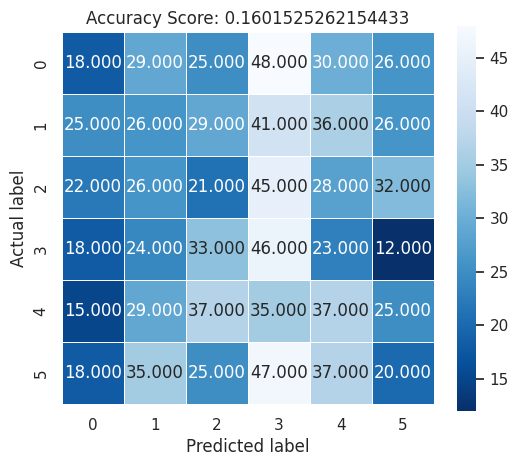

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
score = logreg.score(X_test, y_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 12);

In [ ]:
new_pred = logreg.predict(test_dat['Description'])
print('accuracy %s' % accuracy_score( y_test[:170], new_pred))
print(classification_report(y_test[:170], new_pred,target_names=my_elements))

accuracy 0.14705882352941177
               precision    recall  f1-score   support

    Realistic       0.19      0.19      0.19        31
Investigative       0.08      0.05      0.07        37
     Artistic       0.00      0.00      0.00        20
       Social       0.00      0.00      0.00        28
 Enterprising       0.19      0.50      0.28        30
 Conventional       0.09      0.08      0.09        24

     accuracy                           0.15       170
    macro avg       0.09      0.14      0.10       170
 weighted avg       0.10      0.15      0.11       170



In [ ]:
#new_pred

In [ ]:
predictions = logreg.predict(test_dat['Description'])
predictions_prob = logreg.predict_proba(test_dat['Description'])
newdat = {'Job Titles':test_dat['Job Title'], 'Job Description':test_dat['Description'],'Predicted Element':predictions}
prediction_data = pd.DataFrame(newdat)
prediction_data.head()

,Job Titles,Job Description,Predicted Element
0,System Support Specialist,This position serves as a Systems Support Spec...,Realistic
1,Physician (Psychiatrist),The physician is a recognized psychiatric expe...,Conventional
2,Supervisor Research Psychologist,Serves as the Branch Manager for the NAS Labor...,Realistic
3,Supervisory Program Management Specialist,Serves as the Manager for the Financial and Re...,Conventional
4,Supervisory Compliance and Enforcement Inspector,The incumbent functions as the Deputy Division...,Conventional


In [ ]:
set(predictions)

{'Artistic',
 'Conventional',
 'Enterprising',
 'Investigative',
 'Realistic',
 'Social'}

In [ ]:
predictions_prob

array([[0.15846578, 0.17251519, 0.17796428, 0.12520807, 0.20224981,
        0.16359687],
       [0.18199856, 0.19992776, 0.13349714, 0.16385863, 0.17173967,
        0.14897825],
       [0.16396963, 0.16646353, 0.13344371, 0.17211796, 0.20705675,
        0.15694842],
       ...,
       [0.20685601, 0.12539772, 0.13996285, 0.18670949, 0.17663048,
        0.16444345],
       [0.20685601, 0.12539772, 0.13996285, 0.18670949, 0.17663048,
        0.16444345],
       [0.20685601, 0.12539772, 0.13996285, 0.18670949, 0.17663048,
        0.16444345]])

In [ ]:
# create dataframe of probabilities that each document belongs to each class
model.classes_

array(['Artistic', 'Conventional', 'Enterprising', 'Investigative',
       'Realistic', 'Social'], dtype=object)

In [ ]:
new_dataframe = pd.DataFrame(predictions_prob, columns = model.classes_, index = test_dat['Job Title'])

In [ ]:
new_dataframe.head() # this data frame represents the percentage each job title corresponds with each RIASEC characteristic

,Artistic,Conventional,Enterprising,Investigative,Realistic,Social
Job Title,,,,,,
System Support Specialist,0.158466,0.172515,0.177964,0.125208,0.202250,0.163597
Physician (Psychiatrist),0.181999,0.199928,0.133497,0.163859,0.171740,0.148978
Supervisor Research Psychologist,0.163970,0.166464,0.133444,0.172118,0.207057,0.156948
Supervisory Program Management Specialist,0.177701,0.182858,0.159859,0.146259,0.174484,0.158839
Supervisory Compliance and Enforcement Inspector,0.182511,0.190067,0.144187,0.158984,0.170986,0.153265


In [ ]:
#new_dataframe.to_excel('Probabilities_T1.xlsx')

#files.download('Probabilities_T1.xlsx')